In [236]:
import pandas as pd
import numpy as np
!pip install eli5
import os
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
import math


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [237]:
os.getcwd()

'/content'

In [238]:
#importing the dataset
df_test = pd.read_csv("test_koRSKBP.csv").dropna()
df_train = pd.read_csv("train_BRCpofr.csv").dropna()

In [239]:
df_train.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [240]:
#Q01 : What are the data types? (Only numeric and categorical)
#There are 2 types : Numerical and Categorical
#Numerical - Id, vintage, claim_amount, cltv
#Categorical- gender, area, qualification, income, marital_status, policy, num_policies, type_of_policy

In [241]:
#Q02 : Are there missing values?
#There are no missing values in training and testing datasets
df_test.isnull().sum()

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
dtype: int64

In [242]:
df_train.isnull().sum()

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
cltv              0
dtype: int64

There are no missing 
values

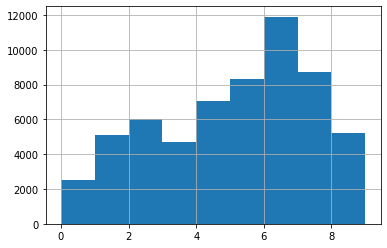

In [243]:
#Q03 : What are the likely distributions of the numeric variables?
bin_values = np.arange(start = 0, stop = 10, step =1)
df_test.vintage.hist(bins=bin_values)
#df_test[df_test.vintage > 7]

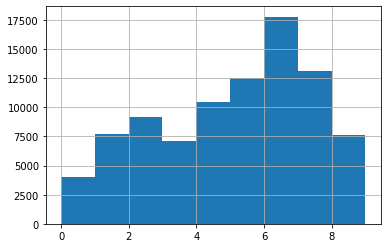

In [244]:
bin_values = np.arange(start = 0, stop = 10, step =1)
df_train.vintage.hist(bins=bin_values)

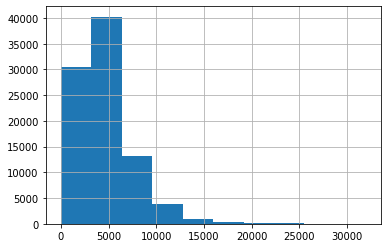

In [245]:
df_train.claim_amount.hist()

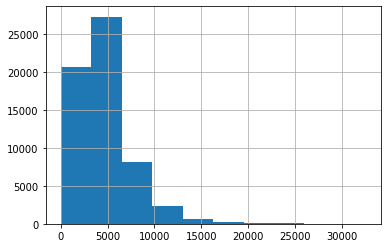

In [246]:
df_test.claim_amount.hist()

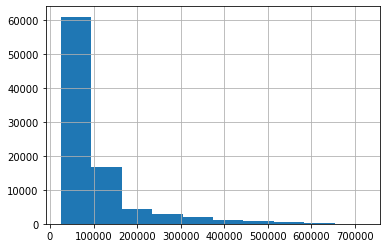

In [247]:
df_train.cltv.hist()

<Figure size 576x360 with 0 Axes>

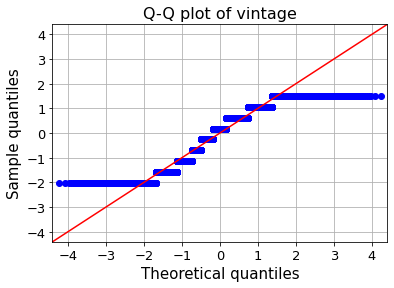

<Figure size 576x360 with 0 Axes>

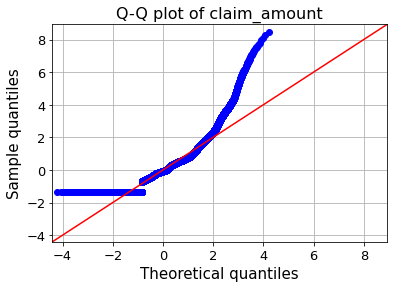

<Figure size 576x360 with 0 Axes>

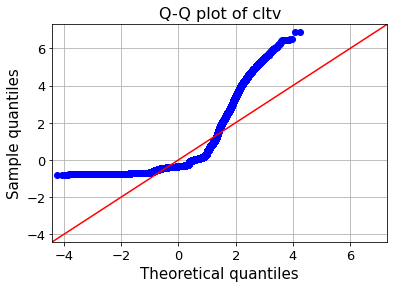

In [248]:
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt 
data_norm= df_train[['vintage', 'claim_amount', 'cltv']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()              

Data transforming, Feature creation and Analysis

In [249]:
df_train_dummies = pd.get_dummies(df_train)

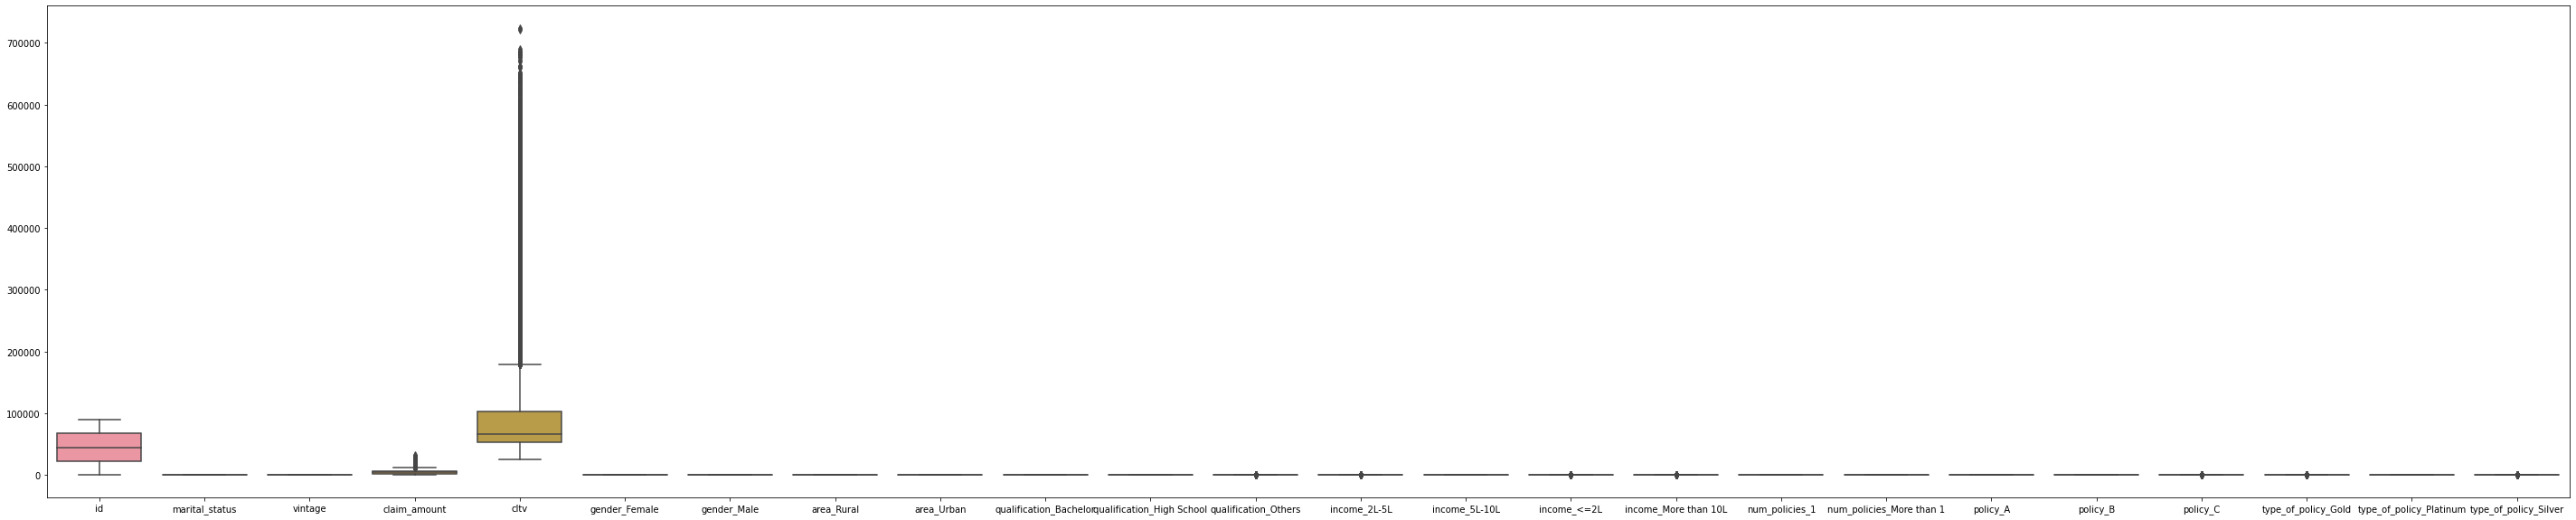

In [251]:
plt.figure(figsize=(50,10))
sns.boxplot(data=df_train_dummies)

It is hard to visualize and read data as they are not in same ranges,trying  to normalize the data for a better understanding and visualization. It will also help later to get normalized coeffiecients when building the Model.

In [200]:
#df_train.corr()
df_train.columns

Index(['id', 'gender', 'area', 'qualification', 'income', 'marital_status',
       'vintage', 'claim_amount', 'num_policies', 'policy', 'type_of_policy',
       'cltv'],
      dtype='object')

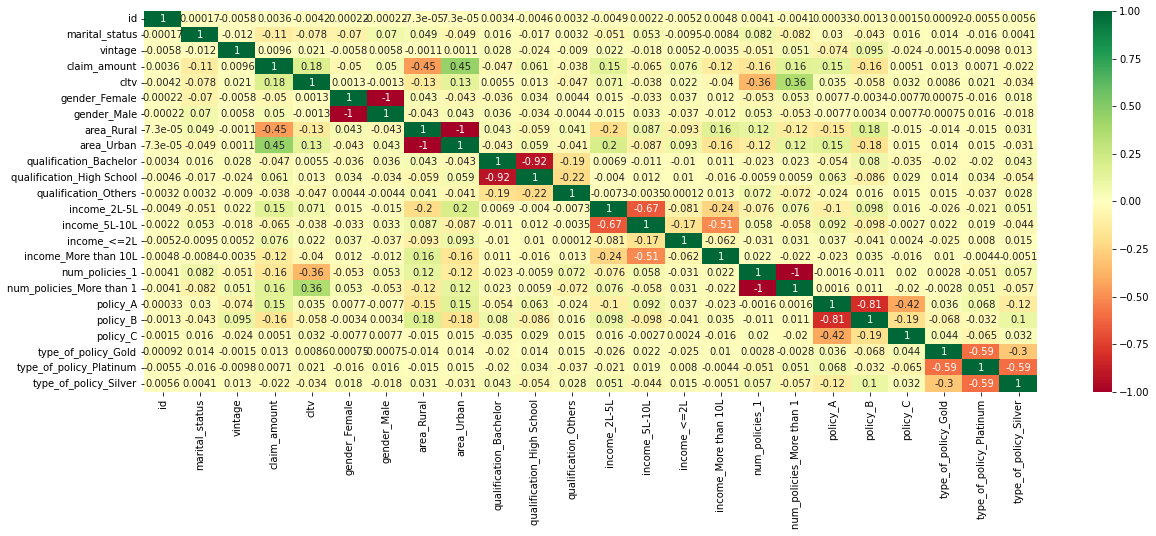

In [252]:
plt.figure(figsize=(20,7))
sns.heatmap(df_train_dummies.corr(), annot=True, cmap='RdYlGn')

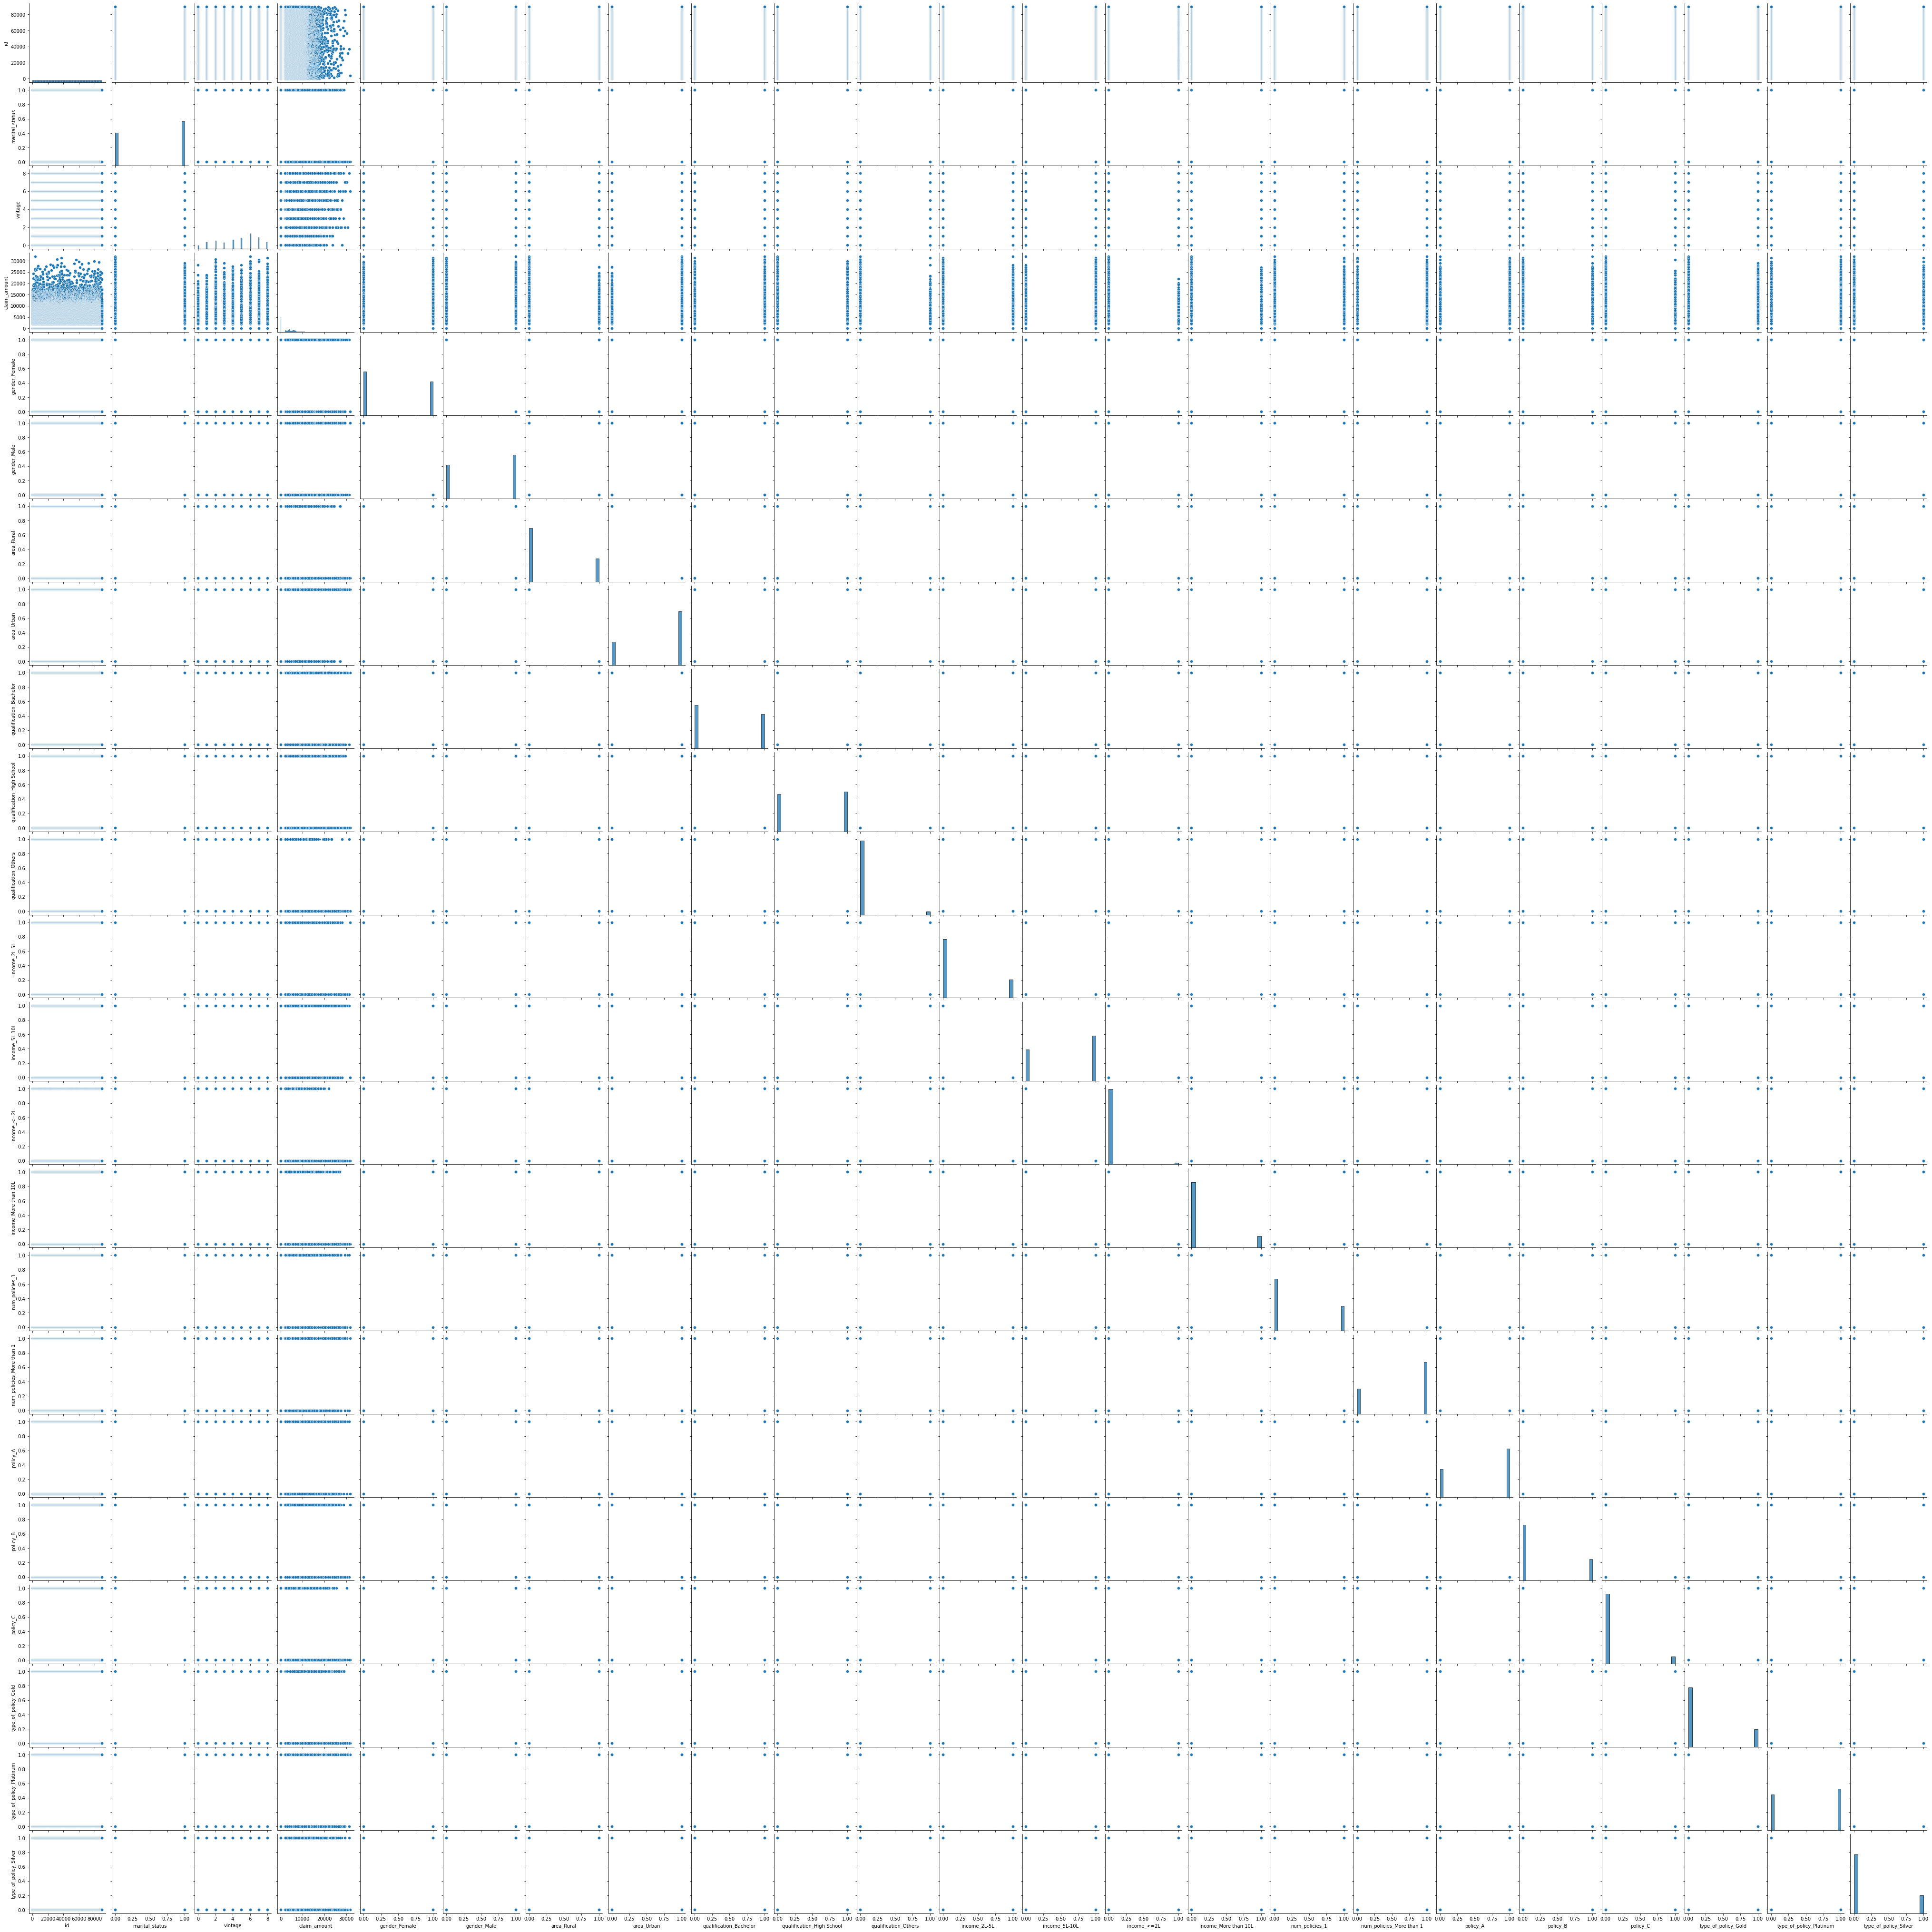

In [184]:
sns.pairplot(df_train_dummies) 

The pair plot shows that there is no much dependency between the variables

In [ ]:
#Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)
#df_train.corr()

from google.colab import drive
drive.mount('/content/drive')

In [202]:
#sns.heatmap(df_train.corr())

In [ ]:
#sns.pairplot(df_train) 

In [253]:
df_train.income.value_counts()

5L-10L           52716
2L-5L            21158
More than 10L    13664
<=2L              1854
Name: income, dtype: int64

In [254]:
#sns.boxplot(data=df_train)
df_train = pd.get_dummies(df_train)

In [255]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(df_train['cltv'], df_train[['id', 'marital_status', 'vintage', 'claim_amount', 'cltv',
       'gender_Female', 'gender_Male', 'area_Rural', 'area_Urban',
       'qualification_Bachelor', 'qualification_High School',
       'qualification_Others', 'income_2L-5L', 'income_5L-10L', 'income_<=2L',
       'income_More than 10L', 'num_policies_1', 'num_policies_More than 1',
       'policy_A', 'policy_B', 'policy_C', 'type_of_policy_Gold',
       'type_of_policy_Platinum', 'type_of_policy_Silver']]).fit()

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cltv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.507e+33
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        04:34:31   Log-Likelihood:             1.9618e+06
No. Observations:               89392   AIC:                        -3.924e+06
Df Residuals:                   89374   BIC:                        -3.923e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
id                         1.207e-15   9.23e-18    130.742      0.000    1.19e-15    1.23e-15
marital_status            -3.801e-11   4.89e-13    -77.669      0.000    -3.9e-11   -3.71e-11
vintage                   -9.308e-13   1.05e-13     -8.891      0.000   -1.14e-12   -7.26e-13
claim_amount              -1.488e-15   8.42e-17    -17.686      0.000   -1.65e-15   -1.32e-15
cltv                          1.0000   2.86e-18    3.5e+17      0.000       1.000       1.000
gender_Female              3.411e-12   3.01e-13     11.340      0.000    2.82e-12       4e-12
gender_Male                1.364e-12    3.1e-13      4.403      0.000    7.57e-13    1.97e-12
area_Rural                  6.48e-12   3.49e-13     18.586      0.000     5.8e-12    7.16e-12
area_Urban                 4.661e-12   3.57e-13     13.057      0.000    3.96e-12    5.36e-12
qualification_Bachelor     9.891e-12   4.55e-13     21.715      0.000       9e-12    1.08e-11
qualification_High School -2.046e-12   4.47e-13     -4.578      0.000   -2.92e-12   -1.17e-12
qualification_Others      -4.775e-12   8.43e-13     -5.664      0.000   -6.43e-12   -3.12e-12
income_2L-5L               8.413e-12   5.71e-13     14.737      0.000    7.29e-12    9.53e-12
income_5L-10L              -3.07e-12   4.91e-13     -6.256      0.000   -4.03e-12   -2.11e-12
income_<=2L                1.137e-13   1.31e-12      0.087      0.931   -2.45e-12    2.68e-12
income_More than 10L      -2.501e-12   6.33e-13     -3.954      0.000   -3.74e-12   -1.26e-12
num_policies_1             6.594e-12   3.25e-13     20.265      0.000    5.96e-12    7.23e-12
num_policies_More than 1   9.095e-13   3.41e-13      2.669      0.008    2.42e-13    1.58e-12
policy_A                   1.137e-13   3.72e-13      0.306      0.760   -6.15e-13    8.42e-13
policy_B                   5.343e-12   4.32e-13     12.361      0.000     4.5e-12    6.19e-12
policy_C                   2.103e-12   5.96e-13      3.528      0.000    9.35e-13    3.27e-12
type_of_policy_Gold        1.307e-11   4.13e-13     31.649      0.000    1.23e-11    1.39e-11
type_of_policy_Platinum   -5.684e-13   3.34e-13     -1.700      0.089   -1.22e-12     8.7e-14
type_of_policy_Silver     -6.935e-12   4.07e-13    -17.037      0.000   -7.73e-12   -6.14e-12
==============================================================================
Omnibus:                    28009.603   Durbin-Watson:                   1.440
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            96875.330
Skew:                           1.577   Prob(JB):                         0.00
Kurtosis:                       7.007   Cond. No.                     1.85e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the er

In [256]:
df_train

,id,marital_status,vintage,claim_amount,cltv,gender_Female,gender_Male,area_Rural,area_Urban,qualification_Bachelor,...,income_<=2L,income_More than 10L,num_policies_1,num_policies_More than 1,policy_A,policy_B,policy_C,type_of_policy_Gold,type_of_policy_Platinum,type_of_policy_Silver
0,1,1,5,5790,64308,0,1,0,1,1,...,0,0,0,1,1,0,0,0,1,0
1,2,0,8,5080,515400,0,1,1,0,0,...,0,0,0,1,1,0,0,0,1,0
2,3,1,8,2599,64212,0,1,0,1,1,...,0,0,0,1,1,0,0,0,1,0
3,4,0,7,0,97920,1,0,1,0,0,...,0,0,0,1,1,0,0,0,1,0
4,5,1,6,3508,59736,0,1,0,1,0,...,0,1,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89387,89388,0,6,0,95736,0,1,1,0,0,...,0,1,0,1,0,1,0,0,1,0
89388,89389,1,0,3897,67596,0,1,0,1,1,...,0,0,0,1,1,0,0,0,1,0
89389,89390,0,4,3363,114120,1,0,0,1,1,...,0,0,0,1,0,1,0,0,1,0
89390,89391,0,8,0,71772,1,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0


Building the Model

Train ,Validation and Test split

In [257]:
from sklearn.model_selection import  train_test_split

y = df_train['cltv']
X = df_train[[col for col in df_train.columns if col != 'cltv']]
#Spliting data into Training, and Test set 
X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=104, train_size=0.8, shuffle=True)


In [258]:
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

In [259]:
# Create linear regression object
model = linear_model.LinearRegression()

# Train the model using the training sets
model.fit(X_train,y_train)

LinearRegression()

In [260]:
# Make predictions using the training set
y_pred = model.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on tarining set =',r2)

Mean squared error: 6952038261.17
Coefficient of determination: 0.15
R^2 score on tarining set = 0.1523511852436199


Since most of the variables are categorical, the linear regression model doesn't fit this data

In [261]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=3, criterion= "squared_error", max_depth= 4)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=3)

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00581
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.12657
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.02239
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.83354
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00363
Feature: 19, Score: 0.00793
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00015


<BarContainer object of 23 artists>

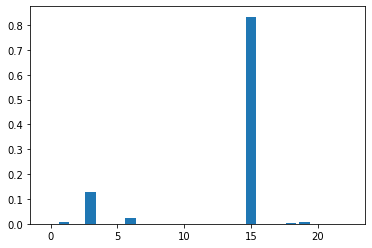

In [262]:
importance = model.feature_importances_
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
#pyplot.show()

Feature: 3, Feature: 15 are the most significant, while remaining features contributed the model and are less significant


In [263]:
 count=0
 for i in df_train.columns:
   count+=1
   print(count,i)

1 id
2 marital_status
3 vintage
4 claim_amount
5 cltv
6 gender_Female
7 gender_Male
8 area_Rural
9 area_Urban
10 qualification_Bachelor
11 qualification_High School
12 qualification_Others
13 income_2L-5L
14 income_5L-10L
15 income_<=2L
16 income_More than 10L
17 num_policies_1
18 num_policies_More than 1
19 policy_A
20 policy_B
21 policy_C
22 type_of_policy_Gold
23 type_of_policy_Platinum
24 type_of_policy_Silver


In [264]:
from sklearn.ensemble import GradientBoostingRegressor

In [265]:
model = GradientBoostingRegressor(learning_rate=0.25)
model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.25)

Feature: 0, Score: 0.05154
Feature: 1, Score: 0.01086
Feature: 2, Score: 0.00523
Feature: 3, Score: 0.15042
Feature: 4, Score: 0.00066
Feature: 5, Score: 0.00147
Feature: 6, Score: 0.01521
Feature: 7, Score: 0.01030
Feature: 8, Score: 0.00086
Feature: 9, Score: 0.00058
Feature: 10, Score: 0.00225
Feature: 11, Score: 0.00507
Feature: 12, Score: 0.00033
Feature: 13, Score: 0.00113
Feature: 14, Score: 0.00118
Feature: 15, Score: 0.50873
Feature: 16, Score: 0.20819
Feature: 17, Score: 0.00051
Feature: 18, Score: 0.01277
Feature: 19, Score: 0.00890
Feature: 20, Score: 0.00156
Feature: 21, Score: 0.00028
Feature: 22, Score: 0.00197


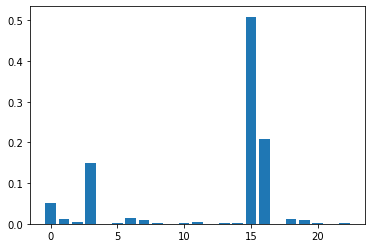

In [266]:
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


Seems like Feature 3, Feature 15 are the most important features (similar to Desision Tree model)

In [267]:
#Imputing methods
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer , IterativeImputer , KNNImputer


In [268]:
np.random.seed(42)

In [269]:
df_train = pd.get_dummies(df_train)
df_train.head(5)

,id,marital_status,vintage,claim_amount,cltv,gender_Female,gender_Male,area_Rural,area_Urban,qualification_Bachelor,...,income_<=2L,income_More than 10L,num_policies_1,num_policies_More than 1,policy_A,policy_B,policy_C,type_of_policy_Gold,type_of_policy_Platinum,type_of_policy_Silver
0,1,1,5,5790,64308,0,1,0,1,1,...,0,0,0,1,1,0,0,0,1,0
1,2,0,8,5080,515400,0,1,1,0,0,...,0,0,0,1,1,0,0,0,1,0
2,3,1,8,2599,64212,0,1,0,1,1,...,0,0,0,1,1,0,0,0,1,0
3,4,0,7,0,97920,1,0,1,0,0,...,0,0,0,1,1,0,0,0,1,0
4,5,1,6,3508,59736,0,1,0,1,0,...,0,1,0,1,1,0,0,1,0,0


In [270]:
copy_1_df = df_train.copy()
copy_5_df = df_train.copy()
copy_10_df = df_train.copy()

In [271]:
#Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods
one_perc = int(df_train.shape[0] * 0.01)
for col in copy_1_df.columns:
  idxs = np.random.randint(0, df_train.shape[0], size=one_perc)
  copy_1_df.loc[idxs, col] = np.nan
  # copy_1_df.loc[copy_1_df.sample(frac=0.01, ).index, col] = np.nan

In [272]:
five_perc = int(df_train.shape[0] * 0.05)
for col in copy_5_df.columns:
  idxs = np.random.randint(0, df_train.shape[0], size=five_perc)
  copy_5_df.loc[idxs, col] = np.nan
  # copy_5_df.loc[copy_5_df.sample(frac=0.05).index, col] = np.nan


In [273]:
ten_perc = int(df_train.shape[0] * 0.1)
for col in copy_10_df.columns:
  idxs = np.random.randint(0, df_train.shape[0], size=ten_perc)
  copy_10_df.loc[idxs, col] = np.nan


In [274]:
#Imputing methods
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer , IterativeImputer , KNNImputer


In [275]:
num_cols = ['claim_amount', 'cltv']

cat_cols = [col for col in copy_1_df.columns if col not in num_cols]
cat_cols.remove('id')

In [276]:
for col in copy_1_df.columns:
  if col not in num_cols:
    copy_1_df[col] = copy_1_df[col].astype('category')

In [277]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

In [278]:
copy_1_df

,id,marital_status,vintage,claim_amount,cltv,gender_Female,gender_Male,area_Rural,area_Urban,qualification_Bachelor,...,income_<=2L,income_More than 10L,num_policies_1,num_policies_More than 1,policy_A,policy_B,policy_C,type_of_policy_Gold,type_of_policy_Platinum,type_of_policy_Silver
0,1.0,1.0,5.0,5790.0,64308.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2.0,0.0,8.0,5080.0,515400.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,3.0,1.0,8.0,2599.0,64212.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,4.0,0.0,7.0,0.0,97920.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,5.0,1.0,6.0,3508.0,59736.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89387,89388.0,0.0,6.0,0.0,95736.0,0.0,1.0,1.0,NaN,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
89388,89389.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
89389,89390.0,0.0,4.0,3363.0,114120.0,1.0,NaN,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
89390,89391.0,0.0,8.0,0.0,NaN,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [279]:
cat_cols

['marital_status',
 'vintage',
 'gender_Female',
 'gender_Male',
 'area_Rural',
 'area_Urban',
 'qualification_Bachelor',
 'qualification_High School',
 'qualification_Others',
 'income_2L-5L',
 'income_5L-10L',
 'income_<=2L',
 'income_More than 10L',
 'num_policies_1',
 'num_policies_More than 1',
 'policy_A',
 'policy_B',
 'policy_C',
 'type_of_policy_Gold',
 'type_of_policy_Platinum',
 'type_of_policy_Silver']

In [280]:
num_cols

['claim_amount', 'cltv']

In [281]:
median_imp = SimpleImputer(missing_values=np.nan, strategy="median")
copy_1_df_num = pd.DataFrame(median_imp.fit_transform(copy_1_df[num_cols]), columns=num_cols)
copy_1_df_num = pd.DataFrame(min_max_scaler.fit_transform(copy_1_df_num), columns=num_cols)

freq_imp = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
copy_1_df_cat = pd.DataFrame(median_imp.fit_transform(copy_1_df[cat_cols]), columns=cat_cols)

In [282]:
df_train_num_cols = pd.DataFrame(min_max_scaler.fit_transform(df_train[num_cols]), columns=num_cols)

In [283]:
import sklearn.metrics as skm
skm.mean_squared_error(df_train_num_cols['cltv'],copy_1_df_num['cltv'])

0.0002004501185212619

In [284]:
for col in cat_cols:
  print(f"Column Name: {col}")
  print(skm.classification_report(df_train[col], copy_1_df_cat[col]))
  print(skm.confusion_matrix(df_train[col], copy_1_df_cat[col]))
  print()

Column Name: marital_status
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     37948
           1       0.99      1.00      1.00     51444

    accuracy                           1.00     89392
   macro avg       1.00      0.99      1.00     89392
weighted avg       1.00      1.00      1.00     89392

[[37560   388]
 [    0 51444]]

Column Name: vintage
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4031
           1       1.00      0.99      0.99      7671
           2       1.00      0.99      1.00      9165
           3       1.00      0.99      1.00      7085
           4       1.00      0.99      1.00     10471
           5       0.94      1.00      0.97     12481
           6       1.00      0.99      0.99     17769
           7       1.00      0.99      1.00     13095
           8       1.00      0.99      0.99      7624

    accuracy                           0.99     89

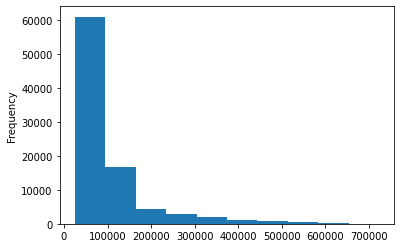

In [285]:
df_train['cltv'].plot(kind='hist')

Based on Separate distribution of eachh numerical column/feature we use different imputing techniques

If column is more of normal distribution then we can use `mean` technique

If column is more of skewed then we can use `median` technique which makes more sense while imputing.

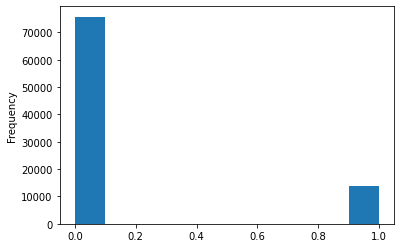

In [286]:
df_train['income_More than 10L'].plot(kind='hist')

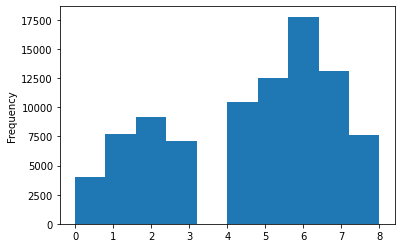

In [287]:
df_train['vintage'].plot(kind='hist')

In [ ]:
#Q05 : Which independent variables have missing data? How much? 
#No missing data

In [174]:
#Q06 : Do the training and test sets have the same data?
#No
df_test.equals(df_train)

False

This implies that the training and test sets doesn't have the same data

In [ ]:
#Is the predictor variables independent of all the other predictor variables?
# Yes, the predictor variables independent of all the other predictor variables

In [175]:
df_train.head()

,id,marital_status,vintage,claim_amount,cltv,gender_Female,gender_Male,area_Rural,area_Urban,qualification_Bachelor,...,income_<=2L,income_More than 10L,num_policies_1,num_policies_More than 1,policy_A,policy_B,policy_C,type_of_policy_Gold,type_of_policy_Platinum,type_of_policy_Silver
0,1,1,5,5790,64308,0,1,0,1,1,...,0,0,0,1,1,0,0,0,1,0
1,2,0,8,5080,515400,0,1,1,0,0,...,0,0,0,1,1,0,0,0,1,0
2,3,1,8,2599,64212,0,1,0,1,1,...,0,0,0,1,1,0,0,0,1,0
3,4,0,7,0,97920,1,0,1,0,0,...,0,0,0,1,1,0,0,0,1,0
4,5,1,6,3508,59736,0,1,0,1,0,...,0,1,0,1,1,0,0,1,0,0


In [176]:
#Lets split the independent variables into X and y
y= df_train.pop('cltv')
X= df_train

In [177]:
y.head(5)

0     64308
1    515400
2     64212
3     97920
4     59736
Name: cltv, dtype: int64

In [178]:
X.head(5)

,id,marital_status,vintage,claim_amount,gender_Female,gender_Male,area_Rural,area_Urban,qualification_Bachelor,qualification_High School,...,income_<=2L,income_More than 10L,num_policies_1,num_policies_More than 1,policy_A,policy_B,policy_C,type_of_policy_Gold,type_of_policy_Platinum,type_of_policy_Silver
0,1,1,5,5790,0,1,0,1,1,0,...,0,0,0,1,1,0,0,0,1,0
1,2,0,8,5080,0,1,1,0,0,1,...,0,0,0,1,1,0,0,0,1,0
2,3,1,8,2599,0,1,0,1,1,0,...,0,0,0,1,1,0,0,0,1,0
3,4,0,7,0,1,0,1,0,0,1,...,0,0,0,1,1,0,0,0,1,0
4,5,1,6,3508,0,1,0,1,0,1,...,0,1,0,1,1,0,0,1,0,0


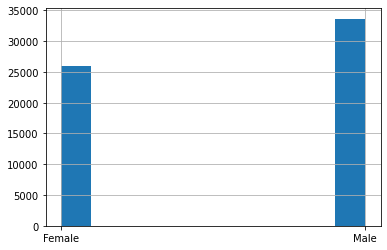

In [179]:
df_test.gender.hist()

In [ ]:
df_train.

## **Answering the assignment questions**

Q1. What are the data types? (Only numeric and categorical)

*   Numerical - Id, vintage, claim_amount, cltv
*   Categorical- gender, area, qualification, income, marital_status, policy, num_policies, type_of_policy




Q2. Are there missing values?


*   There are no missing values in training and testing datasets, i.e No independent variables have any missing data or zeros.



Q3.  What are the likely distributions of the numeric variables?


*   Likely distributions of Numerical variables are plotted above using Histogram, QQ-plot



Q4. Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

*   Vintage (Feature 3), income_more_than_10L(Feature 15) are the most important features based on the Decision Tree Model, Gradient Boosting Regressor Model




Q5. Which independent variables have missing data? How much? 


*   No independent variables have any missing data or zeros as mentioned above


Q6. Do the training and test sets have the same data? 

*   Yes, most of the data are same in test, train data set except the data points in training set are more and few boundary values are not included in train and validation data set. The column 'cltv' - target variable is missing test dataset




Q7. In the predictor variables independent of all the other predictor variables?

*   No, they are independet of each other. There is no multi - collinearity among lot of the independent variable which is shown by the correlation table and pairplot map


Q8. Which predictor variables are the most important?

*   'id', 'marital_status', 'vintage', 'claim_amount', 'cltv',
       'gender_Female', 'gender_Male', 'area_Rural', 'area_Urban',
       'qualification_Bachelor', 'qualification_High School',
       'qualification_Others', 'income_2L-5L', 'income_5L-10L', 
       'income_More than 10L', 'num_policies_1', 'num_policies_More than 1',
       , 'policy_B', 'policy_C', 'type_of_policy_Gold',
       , 'type_of_policy_Silver'

Vintage (Feature 3), income_more_than_10L(Feature 15) are considered to be more significant based on the predictive models

This is determined using p- value, as we know that if p-value > 0.05 the variables are considered least significant otherwise most significant



Q9. Do the ranges of the predictor variables make sense?


*   Since most of the variables are categorical, the range always lies between 0 and 1 (either 0 or 1)
*   Other variables like vintage, claim_amount seems to follow a normal distribution



Q10. What are the distributions of the predictor variables?  

*   Above are the hist distributions




Q11. Remove outliers and keep outliers (does if have an effect of the final predictive model)?

*   Outliers are only present in the target feature column, hence removing the outliers is not possible

*   Since most of the variables are categorical, removing and keeping the outliers is not possible



Q12. Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

For categorical data, calculate the accuracy and a confusion matrix.

*  Based on Separate distribution of eachh numerical column/feature we use different imputing techniques
*  If column is more of normal distribution then we can use mean technique
*  If column is more of skewed then we can use median technique which makes more sense while imputing.

# Conclusion


From the analysis done above on the data set, it is clear that there is no multicolinearity and except income<=2L, policy_A, type_of_policy_Platinum (based on p-value i.e >0.05) all other dependent variables are significant.
Vintage (Feature 3), income_more_than_10L(Feature 15) are considered to be more significant based on the predictive models


# Refernces


1.   Sckit learn offcial documentation
2.   Refered Towards Data Science
3.   Eli5 official documentation

The algorithms were referred directly from the Sckit learn official documentation. Visualization was referred from the Machine Learning with scikit-learn Quick Start Guide and Towards Data Science (How do you check the quality of your regression model in Python?). The remaining code was written independently. Feature importance reference is taken from eli5 offical documnetation

Copyright 2021 AI Skunks

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.